In [63]:
import numpy as np
import torch
from torch import nn
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/spaceship_Titanic/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/spaceship_Titanic/test.csv')
lama=test['PassengerId']

data.head(5)

data.isnull().sum(axis = 0)


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [65]:
#plt.scatter(data['Age'],data['FoodCourt'])
combined=pd.concat([data,test])
data['Group'] = data['PassengerId'].str.split('_',expand=True)[0].astype(int)
test['Group'] = data['PassengerId'].str.split('_',expand=True)[0].astype(int)

data['Group_size']=data['Group'].map(lambda x: pd.concat([data['Group'], test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x: pd.concat([data['Group'], test['Group']]).value_counts()[x])

data[['Cabin_deck','Cabin_number','Cabin_side']]=data['Cabin'].str.split('/',expand=True)
data['Cabin_number']=data['Cabin_number'].astype('Int64')
test[['Cabin_deck','Cabin_number','Cabin_side']]=data['Cabin'].str.split('/',expand=True)
test['Cabin_number']=test['Cabin_number'].astype('Int64')
#split name cabin passenger id
#remove nullvalue and find somewhat correct data
#find a fitting model


In [66]:
from math import nan
#print(data['cnum'].value_counts(dropna=False))
# New features - training set
def num(value):

  if value < 300:
    return 0
  elif 300<= value <600:
    return 1
  elif 600<= value <900:
    return 2
  elif 900<= value <1200:
    return 3
  elif 1200<= value <1500:
    return 4
  elif 1500<= value <1800:
    return 5
  elif value >=1800:
    return 6
data['region']=data['Cabin_number'].map(num,'ignore')
test['region']=test['Cabin_number'].map(num,'ignore')
'''
data['Cabin_region1']=(0==(data['Cabin_number']<300))# one-hot encoding
data['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600))
data['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900))
data['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200))
data['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500))
data['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800))
data['Cabin_region7']=(data['Cabin_number']>=1800)
#arr = pd.array([(data['Cabin_number']<300),(data['Cabin_number']>=300) & (data['Cabin_number']<600)], dtype=pd.Int64Dtype())

# New features - test set
test['Cabin_region1']=((test['Cabin_number']<300))  # one-hot encoding
test['Cabin_region2']=((test['Cabin_number']>=300) & (test['Cabin_number']<600))
test['Cabin_region3']=((test['Cabin_number']>=600) & (test['Cabin_number']<900))
test['Cabin_region4']=((test['Cabin_number']>=900) & (test['Cabin_number']<1200))
test['Cabin_region5']=((test['Cabin_number']>=1200) & (test['Cabin_number']<1500))
test['Cabin_region6']=((test['Cabin_number']>=1500) & (test['Cabin_number']<1800))
test['Cabin_region7']=(test['Cabin_number']>=1800)
'''



"\ndata['Cabin_region1']=(0==(data['Cabin_number']<300))# one-hot encoding\ndata['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600))\ndata['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900))\ndata['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200))\ndata['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500))\ndata['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800))\ndata['Cabin_region7']=(data['Cabin_number']>=1800)\n#arr = pd.array([(data['Cabin_number']<300),(data['Cabin_number']>=300) & (data['Cabin_number']<600)], dtype=pd.Int64Dtype())\n\n# New features - test set\ntest['Cabin_region1']=((test['Cabin_number']<300))  # one-hot encoding\ntest['Cabin_region2']=((test['Cabin_number']>=300) & (test['Cabin_number']<600))\ntest['Cabin_region3']=((test['Cabin_number']>=600) & (test['Cabin_number']<900))\ntest['Cabin_region4']=((test['Cabin_number']>=900) & (test['Cabin

In [67]:
print(data['region'].value_counts(dropna=False))
data['Surname'] = data['Name'].str.split(' ',expand=True)[1]
test['Surname'] = data['Name'].str.split(' ',expand=True)[1]

data['Surname'].fillna('Unknown', inplace=True)
test['Surname'].fillna('Unknown', inplace=True)
# Update family size feature
data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])
test['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

# Put NaN's back in place of outliers
data.loc[data['Surname']=='Unknown','Surname']=np.nan
test.loc[data['Surname']=='Unknown','Surname']=np.nan
# Say unknown surname means no family
data.loc[data['Family_size']>100,'Family_size']=0
test.loc[data['Family_size']>100,'Family_size']=0
data.head()

region
0       3560
1       1488
3        992
2        976
4        938
5        460
<NA>     199
6         80
Name: count, dtype: int64


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Group,Group_size,Cabin_deck,Cabin_number,Cabin_side,region,Surname,Family_size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,1,2,B,0,P,0,Ofracculy,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,2,2,F,0,S,0,Vines,4
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,3,4,A,0,S,0,Susent,6
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,3,4,A,0,S,0,Susent,6
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,4,2,F,1,S,0,Santantines,6


In [68]:
na_cols=data.columns[data.isna().any()].tolist()
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [69]:
y=data['Transported'].copy().astype(int)
x=data.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([x, test], axis=0).reset_index(drop=True)


In [70]:

GHP_gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
#display(GHP_gb)
gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack()
display(gb)
gb.idxmax(axis=1)


HomePlanet,Earth,Europa,Mars
Group,,,
1,1.0,1.0,NaN
2,2.0,NaN,NaN
3,NaN,4.0,NaN
4,2.0,NaN,NaN
5,2.0,NaN,NaN
...,...,...,...
9275,NaN,3.0,NaN
9276,NaN,1.0,NaN
9278,1.0,NaN,NaN


Group
1        Earth
2        Earth
3       Europa
4        Earth
5        Earth
         ...  
9275    Europa
9276    Europa
9278     Earth
9279     Earth
9280    Europa
Length: 6161, dtype: object

In [71]:
#people live same group comfrom same planet
GHP_gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index
data.loc[GHP_index,'HomePlanet']=data.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])


data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='G'), 'HomePlanet']='Earth'

SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index
data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D'), 'HomePlanet']='Earth'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D'), 'HomePlanet']='Mars'


In [72]:
data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

In [73]:
GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)
GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index
data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])


In [74]:
GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index
data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

SCS_gb=data[data['Group_size']>1].groupby(['Surname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)
SCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index
data.loc[SCS_index,'Cabin_side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])
data.loc[data['Cabin_side'].isna(),'Cabin_side']='Z'

In [75]:
GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index
data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])
data.groupby(['HomePlanet','Destination','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
data['Solo']=(data['Group_size']==1).astype(int)
test['Solo']=(test['Group_size']==1).astype(int)
na_rows_CD=data.loc[data['Cabin_deck'].isna(),'Cabin_deck'].index
data.loc[data['Cabin_deck'].isna(),'Cabin_deck']=data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]
from sklearn.linear_model import LinearRegression, LogisticRegression
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    # Features and labels
    X_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
    y_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']
    X_test_CN=data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
    model_CN=LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))

    # Fill missing values with predictions
    data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']=preds_CN.astype(int)

In [76]:
data.loc[data['VIP'].isna(),'VIP']=False
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
data['Expenditure']=data[exp_feats].sum(axis=1)
data['No_spending']=(data['Expenditure']==0).astype(int)
test['Expenditure']=test[exp_feats].sum(axis=1)
test['No_spending']=(test['Expenditure']==0).astype(int)
na_rows_A=data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]


In [77]:
data.loc[data['Age']<=12,'Age_group']='Age_0-12'
data.loc[(data['Age']>12) & (data['Age']<18),'Age_group']='Age_13-17'
data.loc[(data['Age']>=18) & (data['Age']<=25),'Age_group']='Age_18-25'
data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']='Age_26-30'
data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']='Age_31-50'
data.loc[data['Age']>50,'Age_group']='Age_51+'

In [78]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in exp_feats:
    data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

for col in exp_feats:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]

In [79]:
data.drop(['Cabin','Name','region','Surname','Age_group','No_spending','Solo','Group','Group_size','Cabin_number'],axis=1,inplace=True)
data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_deck      0
Cabin_side      0
Family_size     0
Expenditure     0
dtype: int64

In [80]:
data.isna().sum()
data['Cabin_deck'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7},inplace=True)
data['Cabin_side'].replace({'P':0,'S':1,'Z':2},inplace=True)
display(data.Cabin_side.value_counts(dropna=False))
display(data['Destination'].map(type)!=float)
data['HomePlanet'].replace({'Earth':0,'Europa':1,'Mars':2},inplace=True)

data['CryoSleep'].replace({True:0,False:1},inplace=True)

data['VIP'].replace({True:0,False:1},inplace=True)


data['Destination'].replace({'TRAPPIST-1e':0,'55 Cancri e':1,'PSO J318.5-22':2},inplace=True)

data.head()

Cabin_side
1    6536
0    6398
2      36
Name: count, dtype: int64

0        True
1        True
2        True
3        True
4        True
         ... 
12965    True
12966    True
12967    True
12968    True
12969    True
Name: Destination, Length: 12970, dtype: bool

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_side,Family_size,Expenditure
0,0001_01,1,1,0,39.0,1,0.0,0.0,0.0,0.0,0.0,1,0,1,0.0
1,0002_01,0,1,0,24.0,1,109.0,9.0,25.0,549.0,44.0,5,1,4,736.0
2,0003_01,1,1,0,58.0,0,43.0,3576.0,0.0,6715.0,49.0,0,1,6,10383.0
3,0003_02,1,1,0,33.0,1,0.0,1283.0,371.0,3329.0,193.0,0,1,6,5176.0
4,0004_01,0,1,0,16.0,1,303.0,70.0,151.0,565.0,2.0,5,1,6,1091.0


In [81]:
#display(data.No_spending.value_counts(dropna=False))
xdata=data[data['PassengerId'].isin(x['PassengerId'].values)].copy()
xresult=data[data['PassengerId'].isin(test['PassengerId'].values)].copy()
p2=xresult.drop('PassengerId',axis=1,inplace=True)
p1=xdata.drop('PassengerId',axis=1,inplace=True)
len(xdata.index)


8693

In [82]:
xin=torch.tensor(xdata.values,dtype=torch.float32)
yin=torch.tensor(y.values,dtype=torch.float32)
display(y.shape)
xdata.shape

(8693,)

(8693, 14)

In [83]:
class spaceship(nn.Module):
  def __init__(self):
    super().__init__()

    self.p=nn.Sequential(
        nn.Linear(14,64),
        nn.ReLU(),
        nn.Linear(64,16),
        nn.ReLU(),
        nn.Linear(16,1)
    )

  def forward(self,x):
    return self.p(x)



In [84]:
m=spaceship()
p=torch.optim.Adam(m.parameters(),lr=0.001)
l=nn.CrossEntropyLoss()


In [85]:
train=torch.utils.data.TensorDataset(xin[:6954],yin[:6954])
dtr =torch.utils.data.DataLoader(train,batch_size=16, shuffle=True)
testlama=torch.utils.data.TensorDataset(xin[6954:],yin[6954:])
dte=torch.utils.data.DataLoader(testlama,batch_size=16,shuffle=False)
train_features_batch, train_labels_batch = next(iter(dtr))
print(train_features_batch.shape, train_labels_batch.shape)

torch.Size([16, 14]) torch.Size([16])


In [86]:
epochs =20
I=[]
trainloss=[]

b=[]
n=0
testloss=[]
correct=0
for epoch in range(epochs):

  trloss=0
  for batch , (xtr,ytr) in enumerate(dtr):

    m.train()
    a=m(xtr).squeeze()
    y=torch.round(torch.sigmoid(a))
    loss=l(a,ytr)
    p.zero_grad()
    loss.backward()
    p.step()

    trloss += loss
    correct += (ytr==y).sum().item()/16
    n=n+1
    trloss /= len(dtr)

    b.append(batch+(epoch+1)*10000)
    #accuracy(ytr,a)
    # torch.eq() calculates where two tensors are equal
    trainloss.append(loss.detach().numpy())

    if batch%200==0:
      print(f"epoch={batch+(epoch+1)*10000} , train loss={loss.detach().numpy()}")
      print(f"accuracy={(100*correct)/n} ")

  teloss=0
  m.eval()
  with torch.inference_mode():
    for i , (xte,yte) in enumerate(dte):
     I.append(i+(epoch+1)*10000)
     ye=m(xte).squeeze()
     teloss=l(ye,yte)
     te =teloss.detach().numpy()
     testloss.append(te)

len(dtr)

epoch=10000 , train loss=328.6322021484375
accuracy=37.5 
epoch=10200 , train loss=14.078551292419434
accuracy=49.657960199004975 
epoch=10400 , train loss=28.663997650146484
accuracy=51.2001246882793 
epoch=20000 , train loss=27.946548461914062
accuracy=51.33314220183486 
epoch=20200 , train loss=49.33818435668945
accuracy=50.76650943396226 
epoch=20400 , train loss=130.91305541992188
accuracy=50.583133971291865 
epoch=30000 , train loss=20.58286476135254
accuracy=50.47359357060849 
epoch=30200 , train loss=30.002119064331055
accuracy=52.4859943977591 
epoch=30400 , train loss=15.904525756835938
accuracy=52.57671125098348 
epoch=40000 , train loss=20.789783477783203
accuracy=52.42630168453292 
epoch=40200 , train loss=36.634151458740234
accuracy=52.37798804780876 
epoch=40400 , train loss=24.12466812133789
accuracy=52.55715123094959 
epoch=50000 , train loss=27.946186065673828
accuracy=52.8503733486502 
epoch=50200 , train loss=19.55381202697754
accuracy=53.657908294693456 
epoch=5040

435

In [87]:
print(len(dtr)*16)

6960


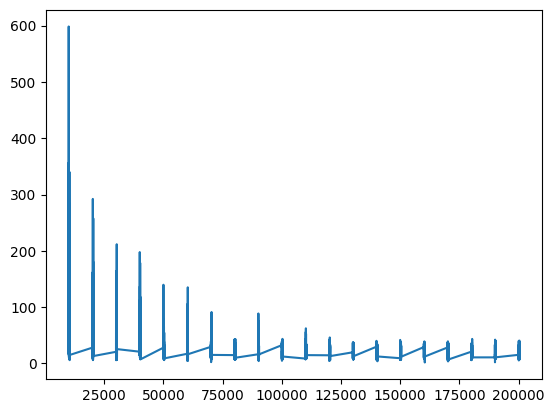

In [88]:
plt.plot(b, trainloss, label="Train loss")

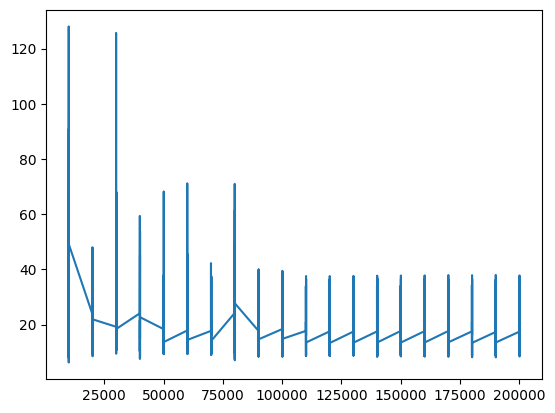

In [89]:
plt.plot(I,testloss)

In [92]:

result=torch.tensor(xresult.values,dtype=torch.float32)
with torch.inference_mode():
    yp=m(result).squeeze()
    ypr=torch.round(torch.sigmoid(yp))

sub=pd.DataFrame(lama)

sub['Transported']=ypr
print(sub)
sub=sub.astype({'Transported':bool})
sub.to_csv("/content/drive/MyDrive/Colab Notebooks/projects/spaceship_Titanic/sample_submission.csv", index=False)

print(sub)
sub['Transported'].value_counts()


     PassengerId  Transported
0        0013_01          1.0
1        0018_01          0.0
2        0019_01          1.0
3        0021_01          1.0
4        0023_01          1.0
...          ...          ...
4272     9266_02          1.0
4273     9269_01          1.0
4274     9271_01          1.0
4275     9273_01          1.0
4276     9277_01          1.0

[4277 rows x 2 columns]
     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01         True
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]


Transported
True     2259
False    2018
Name: count, dtype: int64

In [ ]:
lama